In [3]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue
from scipy.optimize import fsolve

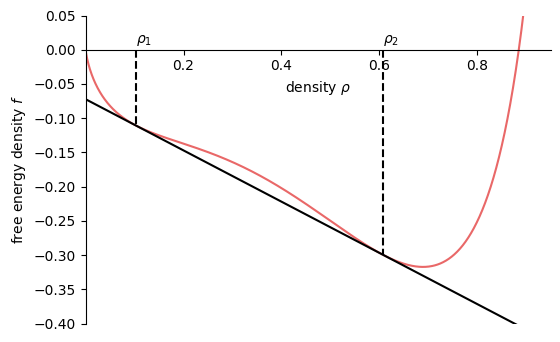

In [4]:
# Global parameters
kbt = 1 # --> all energy (f, a, ...) in units of k_B T
linear_coefficient = 2.5 # add a term linear in rho to f_vdw for a nicer plot
# this linear term has no impact on the conditions for phase coexistence

# Colors
grey = '#eeeeee' # light grey fill
line = '#e96868' # red line
nucleatn_color = '#6a8ba4' # dark blue for nucleation&growth
spinodal_color = '#BBDEF0' # light blue for spinodal decomposition

def f_vdw(rho, a, b):
    """
    Calculates the free energy density for a Van der Waals fluid.
    """
    return kbt*rho*(np.log(rho/(1-b*rho)) - 1) - a*rho**2 + linear_coefficient*kbt*rho

def f_vdw_prime(rho, a, b):
    """
    Calculates the derivative w.r.t. the density rho of the free energy
    density of a VdW fluid.
    """
    return kbt*np.log(rho/(1-b*rho)) + kbt*b*rho/(1-b*rho) - 2*a*rho + linear_coefficient*kbt

def conditions_for_coexistence(x, a, b):
    """
    Function that should be zero when phases coexist. A vector with
    one element mu1 - mu2, and one element p1 - p2.
    """
    rho1 = x[0]
    rho2 = x[1]
    mu1 = f_vdw_prime(rho1, a, b)
    mu2 = f_vdw_prime(rho2, a, b)
    f1 = f_vdw(rho1, a, b)
    f2 = f_vdw(rho2, a, b)
    mu_deficit = mu1 - mu2
    p_deficit  = rho1*mu1 - f1 - rho2*mu2 + f2
    return [mu_deficit, p_deficit]

def f_mix(rho_av, a, b):
    """
    Free energy density for a mixture of gas (density rho1) and liquid (density
    rho2). The gas and liquid densities (rho1 and rho2) are found numerically.
    """
    rhosol = fsolve(conditions_for_coexistence, x0=[0.05, 0.7], args=(a,b))
    rho1 = rhosol[0]
    rho2 = rhosol[1]
    return f_vdw(rho1, a, b) + (f_vdw(rho2, a, b) - f_vdw(rho1, a, b))/(rho2-rho1) * (rho_av - rho1)

## Prepare all the graphs that are to be plotted
# Define the range of densities to plot
rho = np.linspace(0.001, 0.95, 1000)

# Set the parameters a and b
a = 4
b = 1

# Find the densities at which the gas and liquid phases coexist by solving
# numerically. If you use different a and b you might need to change the
# guesses, x0.
rhosol = fsolve(conditions_for_coexistence, x0=[0.05, 0.8], args=(a,b))

## Make the plot
fig, ax = plt.subplots(figsize=(6,4))

# Put axes on the zeros
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Remove label at 0.0
ax.set_xticks([0.2, 0.4, 0.6, 0.8])

# Plot the graphs
ax.plot(rho, f_vdw(rho, a, b), color=line)
ax.plot(rho, f_mix(rho, a, b), 'k')

# Create markers rho1 and rho2
rho1_marker_y = np.linspace(0, f_vdw(rhosol[0], a, b), 10)
rho1_marker_x = np.ones(rho1_marker_y.shape)*rhosol[0]
ax.plot(rho1_marker_x, rho1_marker_y, 'k--')
rho2_marker_y = np.linspace(0, f_vdw(rhosol[1], a, b), 10)
rho2_marker_x = np.ones(rho2_marker_y.shape)*rhosol[1]
ax.plot(rho2_marker_x, rho2_marker_y, 'k--')
ax.text(rhosol[0], 0.01, r'$\rho_1$')
ax.text(rhosol[1], 0.01, r'$\rho_2$')

# Labels
ax.set_xlabel(r'density $\rho$'), ax.set_ylabel(r'free energy density $f$')

# Limits
ax.set_xlim([0, rho[-1]])
ax.set_ylim([-0.4, 0.05])

# Save graph to load in figure later (special Jupyter Book feature)
glue("free_energy_density", fig, display=False)

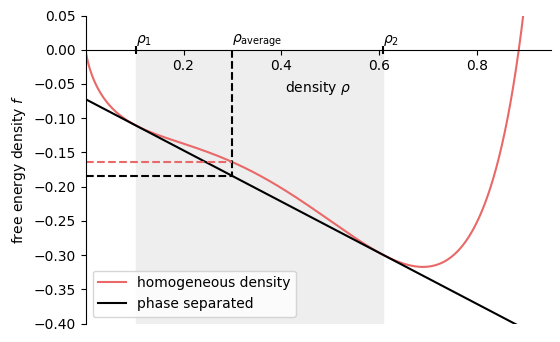

In [6]:
 fig2, ax = plt.subplots(figsize=(6,4))

# Put axes on the zeros
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Remove label at 0.0
ax.set_xticks([0.2, 0.4, 0.6, 0.8])

# Grey area
ax.fill([rhosol[0], rhosol[0], rhosol[1], rhosol[1]],
        [0, -0.4, -0.4, 0],
        color=grey)

# Plot the graphs
ax.plot(rho, f_vdw(rho, a, b), color=line, label='homogeneous density')
ax.plot(rho, f_mix(rho, a, b), 'k', label='phase separated')

# Create markers for rho1 and rho2
ax.scatter(rhosol[0], 0, color='k', marker='|', zorder=10)
ax.scatter(rhosol[1], 0, color='k', marker='|', zorder=10)
ax.text(rhosol[0], 0.01, r'$\rho_1$', zorder=10)
ax.text(rhosol[1], 0.01, r'$\rho_2$', zorder=10)

# Create markers for rho_average
rhoavg = 0.3
rhoavg_marker_y = np.linspace(0, f_mix(rhoavg, a, b), 10)
rhoavg_marker_x = np.ones(rho1_marker_y.shape)*rhoavg
ax.plot(rhoavg_marker_x, rhoavg_marker_y, 'k--')
fmix_at_rhoavg = f_mix(rhoavg, a, b)
fvdw_at_rhoavg = f_vdw(rhoavg, a, b)
hline_x = np.linspace(0, rhoavg, 10)
mix_hline_y = np.ones(hline_x.shape)*fmix_at_rhoavg
vdw_hline_y = np.ones(hline_x.shape)*fvdw_at_rhoavg
ax.plot(hline_x, mix_hline_y, 'k--')
ax.plot(hline_x, vdw_hline_y, '--', color=line)
ax.text(rhoavg, 0.01, r'$\rho_\mathrm{average}$')

# Labels
ax.set_xlabel(r'density $\rho$'), ax.set_ylabel(r'free energy density $f$')

# Limits
ax.set_xlim([0, rho[-1]])
ax.set_ylim([-0.4, 0.05])

# Legend
ax.legend()

# Save graph to load in figure later (special Jupyter Book feature)
glue("free_energy_density_again", fig2, display=False)

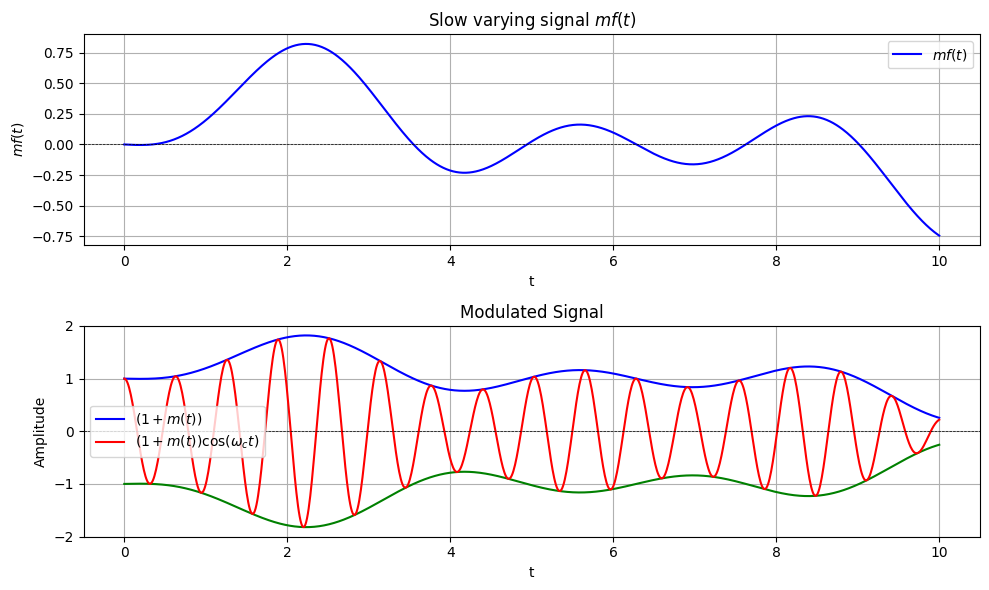

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Time values
t = np.linspace(0, 10, 1000)

# Blue signal: Slow varying function (e.g., sine wave)
m_t = (np.sin(0.5 * t) + np.sin(t) -0.8* np.sin(2*t))/3

# Red signal: Cosine wave modulated by (1 + m(t))
carrier_frequency = 10
red_signal = (1 + m_t) * np.cos(carrier_frequency * t)

# Plot the blue and red signals
plt.figure(figsize=(10, 6))

# Plot blue signal
plt.subplot(2, 1, 1)
plt.plot(t, m_t, label=r"$mf(t)$", color='blue')
plt.title("Slow varying signal $mf(t)$")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("t")
plt.ylabel("$mf(t)$")
plt.grid(True)
plt.legend()

# Plot red signal
plt.subplot(2, 1, 2)
plt.plot(t, 1 + m_t, label=r"$(1 + m(t))$", color='blue')
plt.plot(t, -1 - m_t, color='green')
plt.plot(t, red_signal, label=r"$(1 + m(t)) \cos(\omega_c t)$", color='red')
plt.title("Modulated Signal")
plt.axhline(0, color='black', linewidth=0.5, linestyle="--")
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [40]:
np.roll(data_noise,400)[400-5:400+5]

array([4, 3, 2, 1, 0, 0, 1, 2, 3, 4])

1000


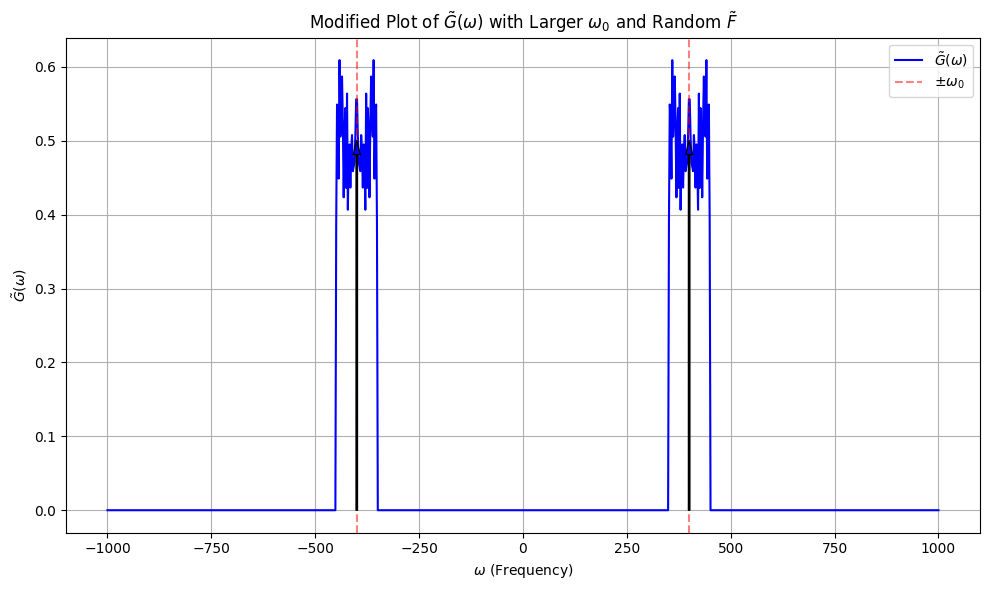

In [57]:
import numpy as np
import matplotlib.pyplot as plt
# Increase omega_0 and make F_tilde more "random"
omega_0 = 400  # Larger center frequency
m=1
omega = np.linspace(-1000,1000,1000)
data_noise = np.random.normal(1,0.1,len(omega)//2)
# data_noise = np.arange(len(omega)//2)
data_noise = np.hstack((data_noise,data_noise[::-1]))
print(len(data_noise))
# Define a more "random" F_tilde function using a noisy Gaussian
def F_tilde_random(omega,omega_0, sigma=50):
    rect = (omega<sigma)*(omega>-sigma)
    data = data_noise*rect
    data = np.roll(data,len(data)//2+np.abs(omega_0)-100)
    if omega_0<0:
        data = data[::-1]
    return data

# Reconstruct G_tilde with the new parameters
G_tilde = 0.5 * (
    m * F_tilde_random(omega, omega_0) +
    m * F_tilde_random(omega, - omega_0)
)

# Plot the function
plt.figure(figsize=(10, 6))

# Plot G_tilde
plt.plot(omega, G_tilde, label=r"$\tilde{G}(\omega)$", color='blue')

# Add more prominent arrows for the delta functions
arrow_props = dict(facecolor='blue', edgecolor='black', shrink=0, width=1, headwidth=5, headlength=10)
plt.annotate("", xy=(omega_0, 0.5), xytext=(omega_0, 0), arrowprops=arrow_props)
plt.annotate("", xy=(-omega_0, 0.5), xytext=(-omega_0, 0), arrowprops=arrow_props)

# Highlight the positions of the delta functions
plt.axvline(omega_0, color='red', linestyle='--', alpha=0.5, label=r"$\pm \omega_0$")
plt.axvline(-omega_0, color='red', linestyle='--', alpha=0.5)

plt.title(r"Modified Plot of $\tilde{G}(\omega)$ with Larger $\omega_0$ and Random $\tilde{F}$")
plt.xlabel(r"$\omega$ (Frequency)")
plt.ylabel(r"$\tilde{G}(\omega)$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

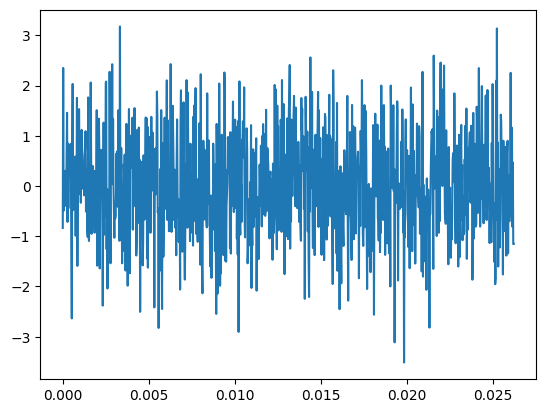

In [93]:
fs = 40000
N = 1050
time_axis = np.arange(N)/fs
f0 = 1000
f1 = 10000
sig_t = np.random.normal(0,1,N)
plt.figure()
plt.plot(time_axis,sig_t)

In [94]:
import scipy.fft as fft 

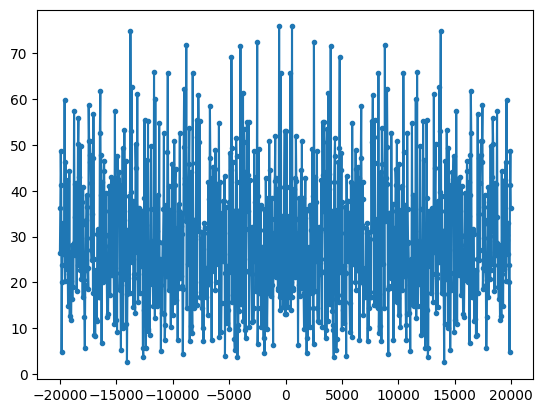

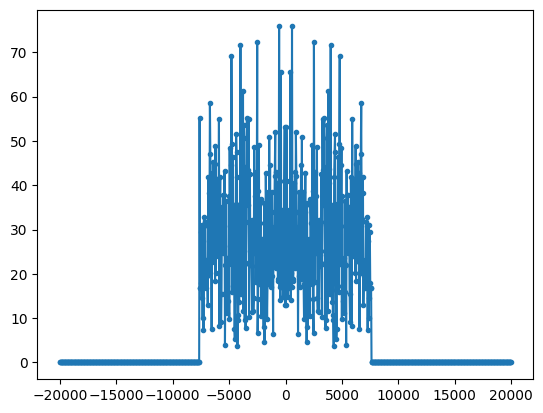

In [95]:
rect_N = 400
rect_f = np.concatenate((np.zeros(N//2-rect_N//2),np.ones(rect_N),np.zeros(N//2-rect_N//2)))
sig_f = fft.fftshift(fft.fft(sig_t))
sig_f_bpf = sig_f*rect_f
freq_axis = fft.fftshift(fft.fftfreq(N,1/fs))
plt.figure()
plt.plot(freq_axis,np.abs(sig_f),'.-')
plt.figure()
plt.plot(freq_axis,np.abs(sig_f_bpf),'.-')

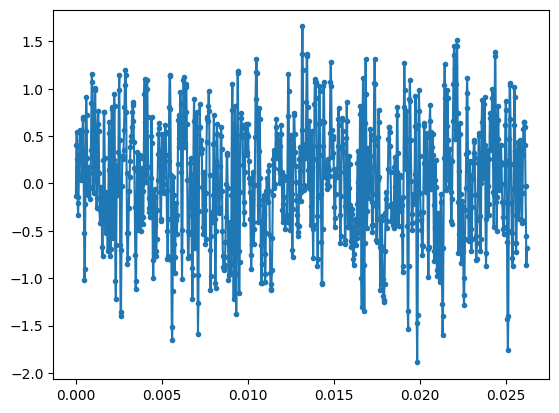

In [101]:
sig_t_bpf = fft.ifft(fft.ifftshift(sig_f_bpf))
plt.figure()
plt.plot(time_axis,sig_t_bpf,'.-')

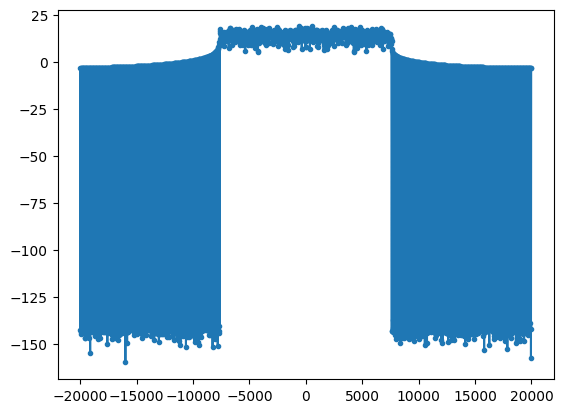

In [107]:
sig_t_bpf_pad = np.concatenate((sig_t_bpf,np.zeros(len(sig_t_bpf))))
sig_f_bpf_pad = fft.fftshift(fft.fft(sig_t_bpf_pad))
freq_pad_axis = fft.fftshift(fft.fftfreq(len(sig_f_bpf_pad),1/fs))
plt.figure()
plt.plot(freq_pad_axis,10*np.log10(np.abs(sig_f_bpf_pad)),'.-')

# base band signal

In [3]:
def spine_plot(ax):
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

In [4]:
import numpy as np
import matplotlib.pyplot as plt

seed = 45
rng=  np.random.default_rng(seed)
# Increase omega_0 and make F_tilde more "random"
omega_0 = 600  # Larger center frequency
m=1
omega = np.linspace(-1000,1000,1000)
data_f = rng.normal(1,0.1,len(omega))
omega_max = 30
rect = (omega<omega_max)*(omega>-omega_max)
data_f = data_f*rect
data_f = np.roll(data_f,omega_0//2)

# analitic signal
plt.figure(figsize=(10, 6))
plt.plot(omega, data_f, label=r"$\tilde{F}(\omega)$", color='blue')
plt.title(r"Plot of $\tilde{F}(\omega)$ passband signal")
plt.xlabel(r"$\omega$ (Frequency)")
plt.ylabel(r"$\tilde{G}(\omega)$")
ax = plt.gca()
spine_plot(ax)
plt.legend()
plt.tight_layout()
plt.show()

# analitic signal
plt.figure(figsize=(10, 6))
plt.plot(omega, data_f+data_f[::-1], label=r"$\tilde{F}(\omega)$", color='blue')
plt.title(r"Plot of $\tilde{F}(\omega)$ transmited signal")
plt.xlabel(r"$\omega$ (Frequency)")
plt.ylabel(r"$\tilde{G}(\omega)$")
ax = plt.gca()
spine_plot(ax)
plt.legend()
plt.tight_layout()
plt.show()

# analitic signal
plt.figure(figsize=(10, 6))
plt.plot(omega, np.roll(data_f,-omega_0//2), label=r"$\tilde{F}(\omega)$", color='blue')
plt.title(r"Plot of $\tilde{Z}(\omega)$ baseband signal")
plt.xlabel(r"$\omega$ (Frequency)")
plt.ylabel(r"$\tilde{G}(\omega)$")
ax = plt.gca()
spine_plot(ax)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'data_noise' is not defined

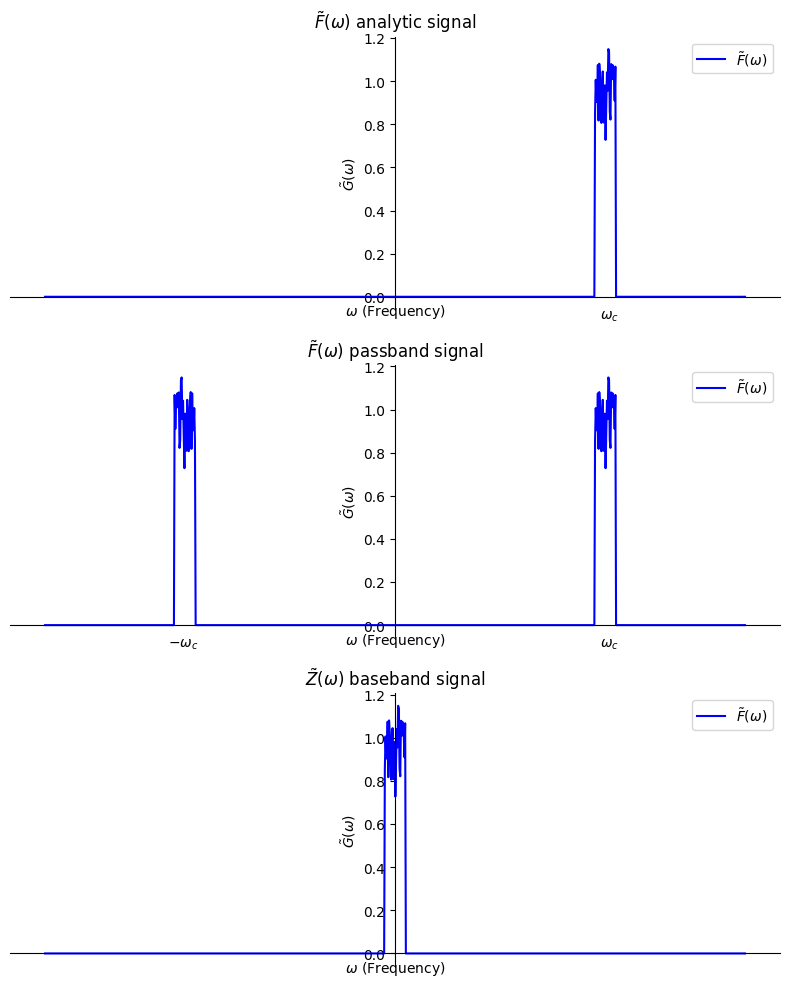

In [36]:
import numpy as np
import matplotlib.pyplot as plt

seed = 45
rng=  np.random.default_rng(seed)
# Increase omega_0 and make F_tilde more "random"
omega_0 = 600  # Larger center frequency
m=1
omega = np.linspace(-1000,1000,1000)
data_f = rng.normal(1,0.1,len(omega))
omega_max = 30
rect = (omega<omega_max)*(omega>-omega_max)
data_f = data_f*rect
data_f = np.roll(data_f,omega_0//2)

fig, axes = plt.subplots(3, 1, figsize=(8, 10))
# analitic signal
axes[0].plot(omega, data_f, label=r"$\tilde{F}(\omega)$", color='blue')
axes[0].set_title(r"$\tilde{F}(\omega)$ analytic signal")
axes[0].set_xlabel(r"$\omega$ (Frequency)")
axes[0].set_ylabel(r"$\tilde{G}(\omega)$")
axes[0].get_xaxis().set_ticks([])
axes[0].annotate(r"$\omega_c$", xy=(omega_0, 0), xytext=(omega_0-15, -0.1))
spine_plot(axes[0])
axes[0].legend()

# analitic signal
axes[1].plot(omega, data_f+data_f[::-1], label=r"$\tilde{F}(\omega)$", color='blue')
axes[1].set_title(r"$\tilde{F}(\omega)$ passband signal")
axes[1].set_xlabel(r"$\omega$ (Frequency)")
axes[1].set_ylabel(r"$\tilde{G}(\omega)$")
axes[1].get_xaxis().set_ticks([])
# add \omega_c and -\omega_c annotate
axes[1].annotate(r"$\omega_c$", xy=(omega_0, 0), xytext=(omega_0-15, -0.1))
axes[1].annotate(r"$-\omega_c$", xy=(-omega_0, 0), xytext=(-omega_0-50, -0.1))
spine_plot(axes[1])
axes[1].legend()

# analitic signal
axes[2].plot(omega, np.roll(data_f,-omega_0//2), label=r"$\tilde{F}(\omega)$", color='blue')
axes[2].set_title(r"$\tilde{Z}(\omega)$ baseband signal")
axes[2].set_xlabel(r"$\omega$ (Frequency)")
axes[2].set_ylabel(r"$\tilde{G}(\omega)$")
axes[2].get_xaxis().set_ticks([])
spine_plot(axes[2])
axes[2].legend()
plt.tight_layout()
plt.show()

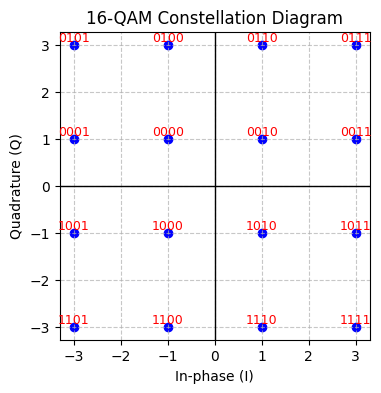

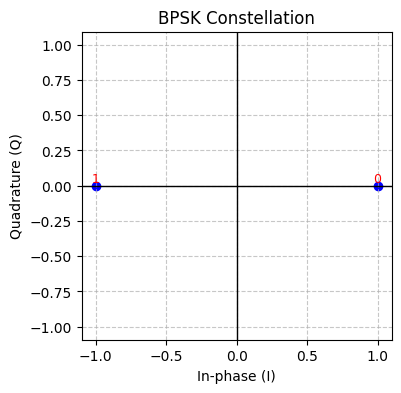

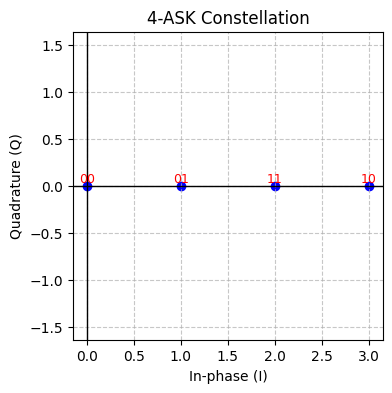

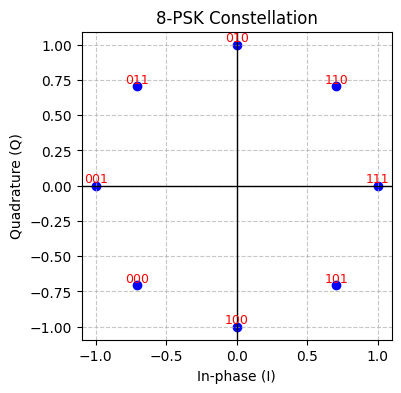

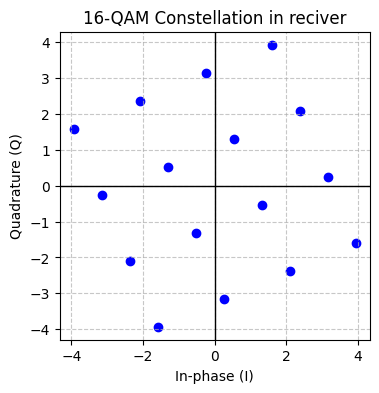

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def plot_constellation(symbols, labels=None, title="Constellation Diagram"):
    """
    Plots a constellation diagram given complex symbols.

    Parameters:
    -----------
    symbols : array-like
        A sequence of complex numbers representing constellation points.
    labels : array-like, optional
        Labels corresponding to each symbol (e.g. binary strings).
    title : str, optional
        Title for the plot.

    Returns:
    --------
    None
    """
    symbols = np.array(symbols)
    x = np.real(symbols)
    y = np.imag(symbols)

    plt.figure(figsize=(4, 4))
    plt.scatter(x, y, color='b', marker='o')

    # Annotate points if labels are provided
    if labels is not None and len(labels) == len(symbols):
        for xi, yi, lab in zip(x, y, labels):
            plt.text(xi, yi, lab, fontsize=9,
                     ha='center', va='bottom',
                     color='red')

    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.title(title)
    plt.xlabel('In-phase (I)')
    plt.ylabel('Quadrature (Q)')

    # Set equal scaling on both axes for a proper square plot
    plt.axis('equal')

    plt.show()

# Example: 16-QAM constellation points
# Typically arranged in a square grid, with equal spacing
# Here we define a simple 16-QAM with points at ±1 and ±3 for both I and Q.
I_values = np.array([-3, -1, 1, 3])
Q_values = np.array([-3j, -1j, 1j, 3j])
# Create grid of points
const_points = [i_val + q_val for i_val in I_values for q_val in Q_values]

# Optional: assign binary labels to each point (e.g., Gray-coded 16-QAM)
# Example labeling for demonstration only
labels = [
    "1101","1001","0001","0101",
    "1100","1000","0000","0100",
    "1110","1010","0010","0110",
    "1111","1011","0011","0111"
]
plot_constellation(const_points, labels, title="16-QAM Constellation Diagram")

bpsk_symbols = [1, -1]
bpsk_labels = ["0", "1"]  # Example labeling
plot_constellation(bpsk_symbols, bpsk_labels, title="BPSK Constellation")

ask_symbols = [0, 1, 2,  3]
ask_labels = ["00", "01", "11", "10"]  # Example binary labeling
plot_constellation(ask_symbols, ask_labels, title="4-ASK Constellation")

M = 8
angles = np.arange(M) * 2*np.pi/M
psk_symbols = [np.exp(1j*theta) for theta in angles]
# Example labels (just incremental binary)
psk_labels = ["111", "110","010","011","001","000","100","101"]
plot_constellation(psk_symbols, psk_labels, title="8-PSK Constellation")


# Example: 16-QAM constellation points
# Typically arranged in a square grid, with equal spacing
# Here we define a simple 16-QAM with points at ±1 and ±3 for both I and Q.
I_values = np.array([-3, -1, 1, 3])
Q_values = np.array([-3j, -1j, 1j, 3j])
# Create grid of points
const_points = [(i_val + q_val)*np.exp(1j*0.4) for i_val in I_values for q_val in Q_values]

# Optional: assign binary labels to each point (e.g., Gray-coded 16-QAM)
# Example labeling for demonstration only
plot_constellation(const_points, title="16-QAM Constellation in reciver")